In [245]:
import numpy as np
from numpy import asarray
import os
import subprocess
import json
import time
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt

In [5]:
os.system("echo Hello from the other side!")
list_files = subprocess.run(["ls", "-l"])
print("The exit code was: %d" % list_files.returncode)

The exit code was: 0


In [9]:
subprocess.run(["curl", "-X", "GET", "https://api.scryfall.com/cards/named?fuzzy=forest"])

CompletedProcess(args=['curl', '-X', 'GET', 'https://api.scryfall.com/cards/named?fuzzy=forest'], returncode=0)

In [5]:
subprocess.run(["curl", "-o", "test.jpg", "https://c1.scryfall.com/file/scryfall-cards/art_crop/front/6/d/6da045f8-6278-4c84-9d39-025adf0789c1.jpg?1562404626"])

CompletedProcess(args=['curl', '-o', 'test.jpg', 'https://c1.scryfall.com/file/scryfall-cards/art_crop/front/6/d/6da045f8-6278-4c84-9d39-025adf0789c1.jpg?1562404626'], returncode=0)

In [87]:
with open('/home/skbarcus/Projects/MtG/Card_Arts/unique-artwork-20200901091942.json') as f:
  cards_data = json.loads(f.read())
  #cards_data = json.load(f)

In [122]:
print(type(cards_data))
print(len(cards_data))
print(len(cards_data[0]))
print(type(cards_data[0]))
#print(cards_data[0])
print(json.dumps(cards_data[0],indent=1))
print(cards_data[0]['image_uris'].get('art_crop'))


<class 'list'>
26795
58
<class 'dict'>
{
 "object": "card",
 "id": "0000579f-7b35-4ed3-b44c-db2a538066fe",
 "oracle_id": "44623693-51d6-49ad-8cd7-140505caf02f",
 "multiverse_ids": [
  109722
 ],
 "mtgo_id": 25527,
 "mtgo_foil_id": 25528,
 "tcgplayer_id": 14240,
 "name": "Fury Sliver",
 "lang": "en",
 "released_at": "2006-10-06",
 "uri": "https://api.scryfall.com/cards/0000579f-7b35-4ed3-b44c-db2a538066fe",
 "scryfall_uri": "https://scryfall.com/card/tsp/157/fury-sliver?utm_source=api",
 "layout": "normal",
 "highres_image": true,
 "image_uris": {
  "small": "https://c1.scryfall.com/file/scryfall-cards/small/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "normal": "https://c1.scryfall.com/file/scryfall-cards/normal/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "large": "https://c1.scryfall.com/file/scryfall-cards/large/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "png": "https://c1.scryfall.com/file/scryfall-cards/png/front/0/0

In [255]:
key = 'name'
target = 'Forest'
ntarget = 0
art_crop_url = ''
file_path = "/home/skbarcus/Projects/MtG/Card_Arts/Images/Forests/"

In [209]:
#Find all instances of the card 'Forest' and download the art crop for each.
start = time.time() #Start a timer.

for i in range(0,len(cards_data)):
    if cards_data[i].get(key) == target:
        art_crop_url = cards_data[i]['image_uris'].get('art_crop')
        #print(art_crop_url)
        ntarget = ntarget + 1
        subprocess.run(["curl", "-o", file_path+"%s_%d.jpg" % (target,ntarget), art_crop_url])
        time.sleep(0.1) #Don't make too many requests of the scryfall servers. (I think this is right?)

print('There are %d cards with key = %s and value = %s.' % (ntarget,key,target))
print("The script took %.2f seconds (%.2f minutes or %.2f hours) to run." % (time.time() - start, (time.time() - start)/60.,(time.time() - start)/60./60.)) #Print time to run.
    

There are 225 cards with key = name and value = Forest.
The script took 115.70 seconds (1.93 minutes or 0.03 hours) to run.


In [260]:
#Load an image.
image = Image.open(file_path+"Forest_1.jpg")
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
#image.show()

xtot = 0
ytot = 0
xavg = 0
yavg = 0
ntot = 0
nlandscape = 0
forests_arr = []

for entry in os.scandir(file_path):
    #print(entry.path)
    if entry.path.startswith(file_path+target):
        #print(entry.path)
        #print(image.size)
        image = Image.open(entry.path)
        if image.size[1]<image.size[0]:     #Remove the landscape images since they may mess with the fitting.
            xtot = xtot + image.size[0]
            ytot = ytot + image.size[1]
            ntot = ntot + 1
            image_resize = image.resize((609,456), Image.ANTIALIAS) #resize chosen as average of portrait arts.
            #Normalize pixel values. Not all out of 255 max, but probably fine.
            #Could do fancier pixel normalization and centering later. (https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)
            pixels = asarray(image_resize)
            pixels = pixels.astype('float32')
            #print('Data Type: %s' % pixels.dtype)
            #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
            pixels /= 255.0
            #print(pixels.shape)
            forests_arr.append(pixels)
            #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
            image_resize.save(file_path+"Resize_Forest_%d.jpg" % ntot , 'JPEG', quality=90) 
            #Note the original and resized numbers do not match.
        if image.size[1]>image.size[0]:     #Count number of landscape images.
                nlandscape = nlandscape + 1
        
xavg = xtot/ntot
yavg = ytot/ntot
print(ntot)
print(xavg,yavg)
print(nlandscape)
forests_arr = np.asarray(forests_arr)
print(type(forests_arr))
print(forests_arr.shape)

np.save(file_path + "forests_arr", forests_arr)

JPEG
RGB
(626, 457)
213
609.1361502347418 455.99530516431923
12
<class 'numpy.ndarray'>
(213, 456, 609, 3)


uint8
(456, 609, 3)


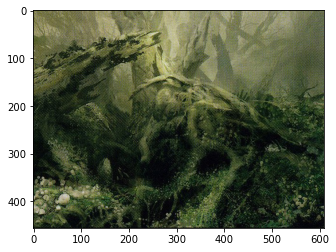

<class 'numpy.ndarray'>
(456, 609, 3)


In [268]:
from matplotlib import image #For some weird reason only works once. I think it's fighting with the other definition of 'image' maybe?
# load image as pixel array
#image = ''
image = image.imread(file_path+"Resize_Forest_1.jpg")
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
plt.imshow(image)
plt.show()

print(type(image))
print(image.shape)
#print(image)
#print(forests_arr[0])